# Using deep learning algorithm- Convolutional Neural Network(CNN) for image classification

## What is deep learning?

Deep learning is inspired by the functionality of human brain cells called artificial neural network.
Deep learning is one of machine learning algorithm that takes data in form of images, videos, text and connections between all the neurons are adjusted according to the pattern of the data

Deep learning is a sub field within machine learning used for learning multiple levels of representation in order to model complex connection between the data
Higher-level features are defined with the help of lower levels and such hierarchy of features is called deep architecture. If we draw a graph showing how these concepts are built over each other the graph is deep with many layers. Hence, we call this learning approach as deep learning



## CNN- Convolutional Neural Network

Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognizing patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables.

A convolution in CNN is nothing but a element wise multiplication i.e. dot product of the image matrix and the filter.

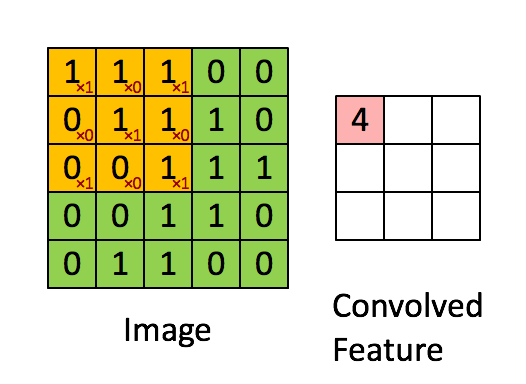

The image in the above example is a 5 x 5 matrix and the filter going over it is a 3 x 3 matrix. A convolution operation takes place between the image and the filter and the convolved feature is generated. Each filter in a CNN, learns different characteristic of an image.

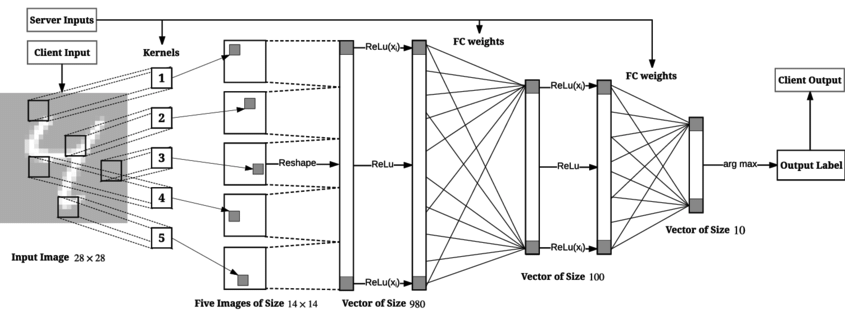

The input image is processed in the first convolutional layer using the filter-weights. This results in 16 new images, one for each filter in the convolutional layer. The images are also down-sampled so the image resolution is decreased from 28x28 to 14x14.

These 16 smaller images are then processed in the second convolutional layer. We need filter-weights for each of these 16 channels, and we need filter-weights for each output channel of this layer. There are 36 output channels so there are a total of 16 x 36 = 576 filters in the second convolutional layer. The resulting images are down-sampled again to 7x7 pixels.

The output of the second convolutional layer is 36 images of 7x7 pixels each. These are then flattened to a single vector of length 7 x 7 x 36 = 1764, which is used as the input to a fully-connected layer with 128 neurons (or elements). This feeds into another fully-connected layer with 10 neurons, one for each of the classes, which is used to determine the class of the image, that is, which number is depicted in the image.

The convolutional filters are initially chosen at random, so the classification is done randomly. The error between the predicted and true class of the input image is measured as the so-called cross-entropy. The optimizer then automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error. This is done iteratively thousands of times until the classification error is sufficiently low.

## Loading necessary packages

### Installing Keras

Keras is a high-level neural network API, written in Python which runs on top of either Tensorflow or Theano. You can install Keras from <a href="https://keras.io/#installation">here</a>

Keras was written to simplify the construction of neural nets, as tensorflow’s API is very verbose. Keras makes everything very easy and you will see it in action below. 

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import RMSprop,adagrad,adamax,nadam
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
import warnings; 
warnings.simplefilter('ignore')


###  Load MNIST dataset

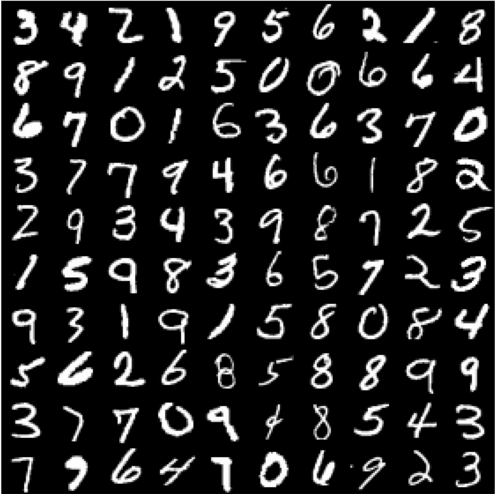

The MNIST dataset is provided by Keras.

The shape of X_train is (60000, 28, 28). Each image has 28 x 28 resolution. The shape of X_test is (10000, 28, 28).

The input shape that a CNN accepts should be in a specific format. If you are using Tensorflow, the format should be (batch, height, width, channels). If you are using Theano, the format should be (batch, channels, height, width).

In [5]:
batch_size = 128
nb_classes = 10
#epochs = 10

img_rows, img_cols = 28, 28         # input image dimensions
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.2                # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5              # drop probability for dropout @ fc layer

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)

if K.image_dim_ordering() == 'th':
    # For Theano backend
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # For TensorFlow backend
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


X_train original shape: (60000, 28, 28)


### Reshaping of images
The shape of X_train is (60000, 28, 28, 1). As all the images are in grayscale, the number of channels is 1. If it was a color image, then the number of channels would be 3 (R, G, B).

Here we’ve rescaled the image data so that each pixel lies in the interval [0, 1] instead of [0, 255]. It is always a good idea to normalize the input so that each dimension has approximately the same scale.



In [7]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### General Details About Convolutional layers, Max Pooling layers, Dropout values and Activation Functions

Keras allows us to specify the number of filters we want and the size of the filters. So, in our first layer, 32 is number of filters and (3, 3) is the size of the filter. We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.

The second layer is the <b>Activation layer</b>. 

The third layer is the <b>MaxPooling layer</b>. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting. It also reduces the number of parameters to learn, reducing the training time.

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

<b>Dense layers</b> are keras’s alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.

<b>Dropout</b> is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.

The second last layer is the Dense layer with 10 neurons. The neurons in this layer should be equal to the number of classes we want to predict as this is the output layer.

The last layer is the <b>Softmax Activation layer</b>. Softmax activation enables us to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

# Case 1
## Convolutional model

The convolutional model consists of 3 convolutional layers and two fully connected layers

<b>Activation function</b> - Activation function calculates a “weighted sum” of its input, adds a bias and then decides whether it should be “fired” or not.
ReLU(Rectified Linear Unit) -
A(x) = max(0,x)

The ReLu function is as shown above. It gives an output x if x is positive and 0 otherwise.
ReLu is nonlinear in nature.

<b>Output optimization function</b> - 
softmax - The softmax function squashes the outputs of each unit to be between 0 and 1. It also divides each output such that the total sum of the outputs is equal to 1. The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.

<b>Loss function</b> - loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event.
categorical_crossentropy - Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.

<b>Optimizer</b>- The optimizer automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error.
RMSprop - Its one of the adaptive learning rate optimization algorithm, Root Mean Square Prop (RMSProp) works by keeping an exponentially weighted average of the squares of past gradients. RMSProp then divides the learning rate by this average to speed up convergence.

<b>network initialization</b>- Initializations define the way to set the initial random weights of Keras layers.
he_normal - 
It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.

In [5]:
# Convolutional model
model = Sequential()

# conv1 layer
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=input_shape, init='he_normal'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', init='he_normal'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))

# fc1 layer
model.add(Dense(625, activation='relu', init='he_normal'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(10, activation='softmax', init='he_normal'))

opt = RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [20]:
# Train
history = model.fit(X_train, Y_train, epochs=10, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0322 - acc: 0.9906
Epoch 2/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0322 - acc: 0.9909
Epoch 3/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0295 - acc: 0.9919
Epoch 4/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0310 - acc: 0.9920
Epoch 5/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0302 - acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0303 - acc: 0.9913
Epoch 7/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0285 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0303 - acc: 0.9916
Epoch 9/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0326 - acc: 0.9919
Epoch 10/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0292 - acc: 0.9920

In [21]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 5s 481us/step
Summary: Loss over the test dataset: 0.02, Accuracy: 0.9940


## The accuracy of the model  is 99.4%

# Case 2 
## Convolutional model

The convolutional model consists of 3 convolutional layers and two fully connected layers

<b>Activation function</b> - Activation function calculates a “weighted sum” of its input, adds a bias and then decides whether it should be “fired” or not.
ReLU(Rectified Linear Unit) -
A(x) = max(0,x)

The ReLu function is as shown above. It gives an output x if x is positive and 0 otherwise.
ReLu is nonlinear in nature.

<b>Output optimization function</b> - 
softmax - The softmax function squashes the outputs of each unit to be between 0 and 1. It also divides each output such that the total sum of the outputs is equal to 1. The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.

<b>Loss function</b> - loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event.

<b>Optimizer</b>- The optimizer automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error.
adagrad - AdaGrad is an optimization method that allows different step sizes for different features. It increases the influence of rare but informative features.

<b>network initialization</b>- Initializations define the way to set the initial random weights of Keras layers.
uniform - Initializer that generates tensors with a uniform distribution.



In [8]:
# Convolutional model
model2 = Sequential()

# conv1 layer
model2.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=input_shape, init='uniform'))
model2.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model2.add(Dropout(prob_drop_conv))

# conv2 layer
model2.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='uniform'))
model2.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model2.add(Dropout(prob_drop_conv))

# conv3 layer
model2.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', init='uniform'))
model2.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model2.add(Flatten())
model2.add(Dropout(prob_drop_conv))

# fc1 layer
model2.add(Dense(625, activation='relu', init='uniform'))
model2.add(Dropout(prob_drop_hidden))

# fc2 layer
model2.add(Dense(10, activation='softmax', init='uniform'))

model2.compile(optimizer=adagrad(), loss='poisson', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [9]:
# Train
case2 = model2.fit(X_train, Y_train, epochs=10, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1307 - acc: 0.8983
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1086 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1067 - acc: 0.9798
Epoch 4/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1055 - acc: 0.9829
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1050 - acc: 0.9845
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1044 - acc: 0.9863
Epoch 7/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1041 - acc: 0.9869
Epoch 8/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1038 - acc: 0.9880
Epoch 9/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1034 - acc: 0.9891
Epoch 10/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1033 - acc: 0.9894

In [10]:
# Evaluate
evaluation2 = model2.evaluate(X_test, Y_test, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation2[0], evaluation2[1]))

10000/10000 [==============================] - 4s 383us/step
Summary: Loss over the test dataset: 0.10, Accuracy: 0.9938


## The accuracy predicted from case 2 is 99.38%

# Case 3
## Convolutional model

The convolutional model consists of 4 convolutional layers and two fully connected layers

<b>Activation function</b> - Activation function calculates a “weighted sum” of its input, adds a bias and then decides whether it should be “fired” or not.
Linear - A = cx
A straight line function where activation is proportional to input ( which is the weighted sum from neuron ).

<b>Output optimization function</b> - 
softmax - The softmax function squashes the outputs of each unit to be between 0 and 1. It also divides each output such that the total sum of the outputs is equal to 1. The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.

<b>Loss function</b> - loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event.
kullback_leibler_divergence - The Kullback–Leibler divergence (also called relative entropy) is a measure of how one probability distribution diverges from a second, expected probability distribution.

<b>Optimizer</b>- The optimizer automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error.
adamax - It is a variant of Adam based on the infinity norm

<b>network initialization</b>- Initializations define the way to set the initial random weights of Keras layers.
uniform - Initializer that generates tensors with a uniform distribution.



In [11]:
# Convolutional model
model3 = Sequential()

# conv1 layer
model3.add(Convolution2D(32, 3, 3, border_mode='same', activation='linear', input_shape=input_shape, init='uniform'))
model3.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model3.add(Dropout(prob_drop_conv))

# conv2 layer
model3.add(Convolution2D(64, 3, 3, border_mode='same', activation='linear', init='uniform'))
model3.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model3.add(Dropout(prob_drop_conv))

# conv3 layer
model3.add(Convolution2D(128, 3, 3, border_mode='same', activation='linear', init='uniform'))
model3.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model3.add(Dropout(prob_drop_conv)) 

# conv4 layer
model3.add(Convolution2D(256, 3, 3, border_mode='same', activation='linear', init='uniform'))
model3.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model3.add(Flatten())
model3.add(Dropout(prob_drop_conv))

# fc1 layer
model3.add(Dense(625, activation='linear', init='uniform'))
model3.add(Dropout(prob_drop_hidden))

# fc2 layer
model3.add(Dense(10, activation='softmax', init='uniform'))

model3.compile(optimizer=adamax(), loss='kullback_leibler_divergence', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [12]:
# Train
case3 = model3.fit(X_train, Y_train, epochs=20, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.3056 - acc: 0.9002
Epoch 2/20
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0909 - acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0664 - acc: 0.9799
Epoch 4/20
60000/60000 [==============================] - 363s 6ms/step - loss: 0.0540 - acc: 0.9835
Epoch 5/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0461 - acc: 0.9854
Epoch 6/20
60000/60000 [==============================] - 808s 13ms/step - loss: 0.0393 - acc: 0.9883
Epoch 7/20
60000/60000 [==============================] - 774s 13ms/step - loss: 0.0317 - acc: 0.9900
Epoch 8/20
60000/60000 [==============================] - 3374s 56ms/step - loss: 0.0307 - acc: 0.9902
Epoch 9/20
60000/60000 [==============================] - 3255s 54ms/step - loss: 0.0274 - acc: 0.9911
Epoch 10/20
60000/60000 [==============================] - 2091s 35ms/step - loss: 0.

In [13]:
# Evaluate
evaluation3 = model3.evaluate(X_test, Y_test, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' %  (evaluation3[0], evaluation3[1]))

10000/10000 [==============================] - 7s 667us/step
Summary: Loss over the test dataset: 0.03, Accuracy: 0.9934


## The accuracy of the model for case 3 is 99.34%

# Case 4
## Convolutional model

The convolutional model consists of 3 convolutional layers and two fully connected layers

<b>Activation function</b> - Activation function calculates a “weighted sum” of its input, adds a bias and then decides whether it should be “fired” or not.
ReLU(Rectified Linear Unit) -
A(x) = max(0,x)

The ReLu function is as shown above. It gives an output x if x is positive and 0 otherwise.
ReLu is nonlinear in nature.

<b>Output optimization function</b> - 
softmax - The softmax function squashes the outputs of each unit to be between 0 and 1. It also divides each output such that the total sum of the outputs is equal to 1. The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.

<b>Loss function</b> - loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event.
categorical_crossentropy - Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.

<b>Optimizer</b>- The optimizer automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error.
RMSprop - Its one of the adaptive learning rate optimization algorithm, Root Mean Square Prop (RMSProp) works by keeping an exponentially weighted average of the squares of past gradients. RMSProp then divides the learning rate by this average to speed up convergence.

<b>network initialization</b>- Initializations define the way to set the initial random weights of Keras layers.
he_normal - 
It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.

In [17]:
# Convolutional model
model5 = Sequential()

# conv1 layer
model5.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=input_shape, init='he_normal'))
model5.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model5.add(Dropout(prob_drop_conv))

# conv2 layer
model5.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal'))
model5.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model5.add(Dropout(prob_drop_conv))

# conv3 layer
model5.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', init='he_normal'))
model5.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model5.add(Flatten())
model5.add(Dropout(prob_drop_conv)) 

# fc1 layer
model5.add(Dense(625, activation='relu', init='he_normal'))
model5.add(Dropout(prob_drop_hidden))

# fc2 layer
model5.add(Dense(10, activation='softmax', init='he_normal'))

opt = RMSprop(lr=0.001, rho=0.9)
model5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [18]:
# Train
case5 = model5.fit(X_train, Y_train, epochs=50, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/50
60000/60000 [==============================] - 801s 13ms/step - loss: 0.2755 - acc: 0.9142
Epoch 2/50
60000/60000 [==============================] - 2330s 39ms/step - loss: 0.0753 - acc: 0.9770
Epoch 3/50
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0592 - acc: 0.9824
Epoch 4/50
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0506 - acc: 0.9853
Epoch 5/50
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0428 - acc: 0.9868
Epoch 6/50
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0437 - acc: 0.9875
Epoch 7/50
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0366 - acc: 0.9894
Epoch 8/50
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0353 - acc: 0.9891
Epoch 9/50
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0326 - acc: 0.9907
Epoch 10/50
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0328 

In [19]:
# Evaluate
evaluation5 = model5.evaluate(X_test, Y_test, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' %  (evaluation5[0], evaluation5[1]))

10000/10000 [==============================] - 4s 389us/step
Summary: Loss over the test dataset: 0.04, Accuracy: 0.9901


## The accuracy of the model for case 4 is 99.01%

# Licenses

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by SHWETA TATIYA and RADHIKA GATHIA is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by SHWETA TATIYA and RADHIKA GATHIA is licensed under the MIT License https://opensource.org/licenses/MIT

# References

In [1]:
# Dataset 
#http://yann.lecun.com/exdb/mnist/

# References

# https://github.com/nikbearbrown/NEU_COE
# MIT 6.S191: Introduction to Deep Learning https://youtu.be/JN6H4rQvwgY
# https://youtu.be/v5JvvbP0d44
# https://youtu.be/ixF5WNpTzCA
# https://youtu.be/jajksuQW4mc
# https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
# http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
# https://keras.io/losses/